In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

 Your spectra have been computed! 😎 
 Your spectra have been computed! 😎 


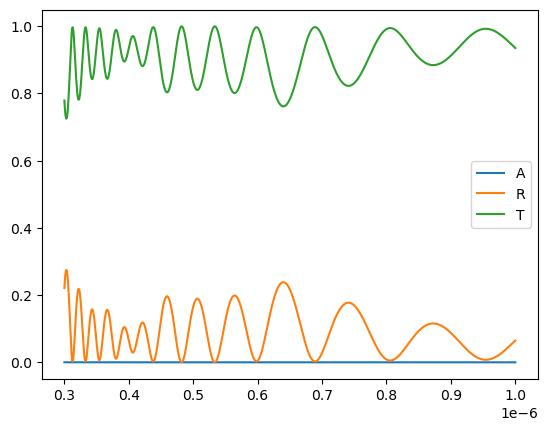

In [2]:
"""unit test for the computation of the gradients of stpv quantities
    including the stpv_power_density and the spectral_efficiency"""
test_args = {
    "wavelength_list": [300e-9, 1000e-9, 1000],
    "material_list": ["Air", "SiO2", "Al2O3", "Polystyrene", "Air"],
    "thickness_list": [0, 200e-9, 300e-9, 1000e-9, 0],
    "temperature": 440,
}
sf = wptherml.SpectrumFactory()
test = sf.spectrum_factory("Tmm", test_args)

test2_args = {
    "wavelength_list": [300e-9, 1000e-9, 1000],
    "material_list": ["Air", "SiO2", "Al2O3", "Polystyrene", "Air"],
    "thickness_list": [0, 205e-9, 300e-9, 1000e-9, 0],
    "temperature": 440,
}
sf = wptherml.SpectrumFactory()
test2 = sf.spectrum_factory("Tmm", test2_args)




plt.plot(test.wavelength_array, test.emissivity_array, label="A")
plt.plot(test.wavelength_array, test.reflectivity_array, label="R")
plt.plot(test.wavelength_array, test.transmissivity_array, label="T")
plt.legend()
plt.show()


In [ ]:

_ln = len(test.thickness_array) - 1
# insert thick active layer as the bottom-most layer
test.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test.material_2D_HOIP(_ln)
test.compute_spectrum()
#test.compute_pv_stpv_gradient()

# insert thick active layer as the bottom-most layer
test2.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test2.material_2D_HOIP(_ln)
test2.compute_spectrum()

plt.plot(test.wavelength_array, test.emissivity_array, 'blue', label="A")
plt.plot(test2.wavelength_array, test2.emissivity_array, 'red', label="A2")
#plt.plot(test.wavelength_array, test.reflectivity_array, label="R")
#plt.plot(test.wavelength_array, test.transmissivity_array, label="T")
plt.legend()
plt.show()

diff = np.abs(test.emissivity_array - test2.emissivity_array)
sum_abs = np.sum(diff)
print(sum_abs)

In [3]:
test.compute_pv_stpv_jsc()
_jsc_b = test.pv_stpv_jsc

test2.compute_pv_stpv_jsc()
_jsc_f = test2.pv_stpv_jsc

print("forward jsc", _jsc_f)
print("backward jsc", _jsc_b)
print("difference", _jsc_f - _jsc_b)


 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!
forward jsc 979.5691011008975
backward jsc 979.5691011008975
difference 0.0
